### Student Peformance Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\dell\Desktop\python\kai analytics 2\Intermediate projects\Student Performance\StudentsPerformance.csv")

In [3]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df = data.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


#### Rename columns names for easier reading¶

In [11]:
df.rename(inplace=True, columns={'race/ethnicity': 'race_ethnicity',
                                  'parental level of education': 'education_level',
                                  'test preparation course': 'prep_course',
                                   'math score': 'math_score',
                                    'reading score': 'reading_score',
                                     'writing score': 'writing_score'})

In [12]:
df.columns

Index(['gender', 'race_ethnicity', 'education_level', 'lunch', 'prep_course',
       'math_score', 'reading_score', 'writing_score'],
      dtype='object')

### Create a new column called "average_score" to see the scores together.

In [13]:
df['average_score'] =df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089000,15.163080,0.0,57.000000,66.000000,77.000000,100.0
reading_score,1000.0,69.169000,14.600192,17.0,59.000000,70.000000,79.000000,100.0
writing_score,1000.0,68.054000,15.195657,10.0,57.750000,69.000000,79.000000,100.0
average_score,1000.0,67.770667,14.257326,9.0,58.333333,68.333333,77.666667,100.0


### Let us create a new column called "grade" and assign the grades

In [16]:
def Grade(AverageScore):
    if(AverageScore>=80): return 'A'
    if(AverageScore>=70): return 'B'
    if(AverageScore>=60): return 'C'
    if(AverageScore>=50): return 'D'
    if(AverageScore>=40): return 'E'
    
    else: return 'F'
    
df['grade'] = df.apply(lambda x: Grade(x['average_score']), axis=1)
    

    

        

### Let's create a simple pie chart to see the grade distributions.

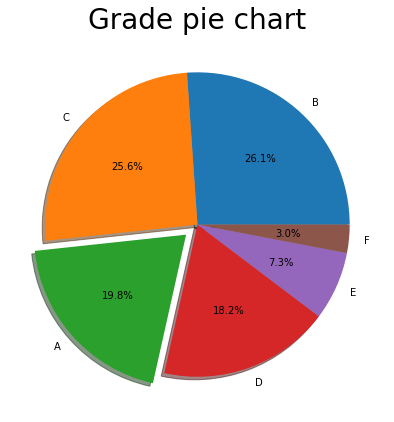

In [20]:
plt.figure(figsize=(7,7))
plt.pie(df['grade'].value_counts().values,
        labels=df['grade'].value_counts().index,
        autopct = '%1.1f%%',
        shadow = True,
        explode = [0,0,0.1,0,0,0])

plt.title('Grade pie chart', color='Black', fontsize=28)
plt.show()

### Take a look at score heatmap

<AxesSubplot:title={'center':'Score heatmap'}>

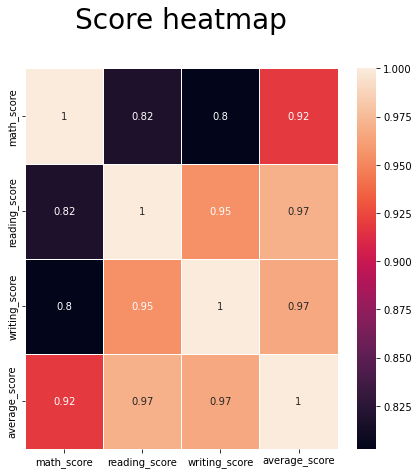

In [22]:
plt.figure(figsize=(7,7))
plt.title('Score heatmap', color='Black', pad=40, fontsize=28)
sns.heatmap(df.corr(), annot=True, linewidths=.5)

### What I want to know

###  Q1: What is the effect of gender and education level on average score?

In [23]:
df.head(2)

,gender,race_ethnicity,education_level,lunch,prep_course,math_score,reading_score,writing_score,average_score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,A


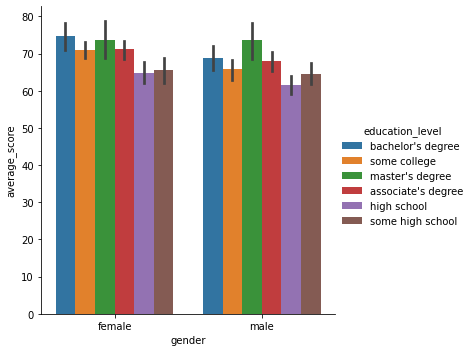

In [24]:
sns.catplot(data=df, x='gender', y='average_score', hue='education_level', kind='bar', height=5);

### Q2: What is the effect of gender and preparation course on average score?

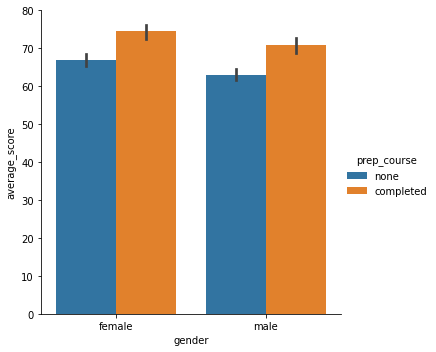

In [26]:
sns.catplot(data=df,x='gender', y='average_score', hue='prep_course', kind='bar', height=5);

### Q3: Which group is the most successful? (on average_score)?

race_ethnicity
group A    62.992509
group B    65.468421
group C    67.131661
group D    69.179389
group E    72.752381
Name: average_score, dtype: float64

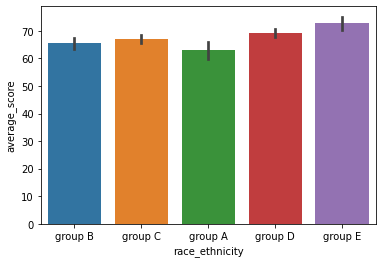

In [27]:
sns.barplot(x='race_ethnicity', y='average_score', data=df)
df.groupby('race_ethnicity')['average_score'].mean()

### "group E" is the most successful group. However, why?. I make some research.

In [28]:
df.groupby('race_ethnicity')['education_level'].describe()

,count,unique,top,freq
race_ethnicity,,,,
group A,89,6,some high school,24
group B,190,6,high school,48
group C,319,6,associate's degree,78
group D,262,6,some college,67
group E,140,6,associate's degree,39


In [29]:
df.groupby('race_ethnicity')['prep_course'].describe()

,count,unique,top,freq
race_ethnicity,,,,
group A,89,2,none,58
group B,190,2,none,122
group C,319,2,none,202
group D,262,2,none,180
group E,140,2,none,80


In [30]:
df.groupby('race_ethnicity')['grade'].describe()

,count,unique,top,freq
race_ethnicity,,,,
group A,89,6,D,24
group B,190,6,C,58
group C,319,6,B,87
group D,262,6,B,79
group E,140,6,A,44


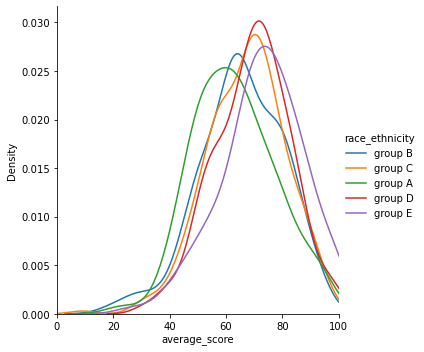

In [32]:
(sns.FacetGrid(df, hue='race_ethnicity', height=5, xlim=(0,100))
.map(sns.kdeplot, 'average_score')
.add_legend())

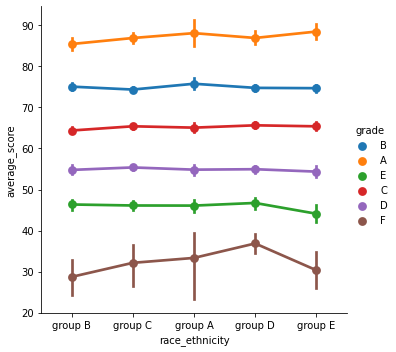

In [34]:
sns.catplot(data=df, x='race_ethnicity', y='average_score', kind='point', hue='grade')

### Finally, I want to show you the last graph. I believe this graph will give us important assumptions about scores.

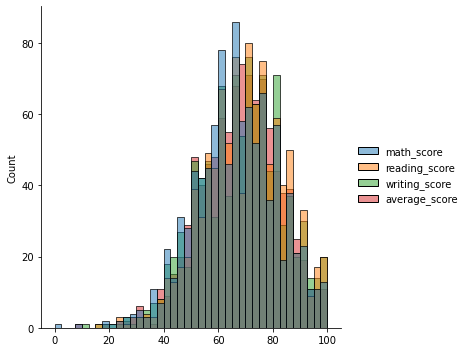

In [35]:
sns.displot(df)

### THE END